In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import pandas as pd

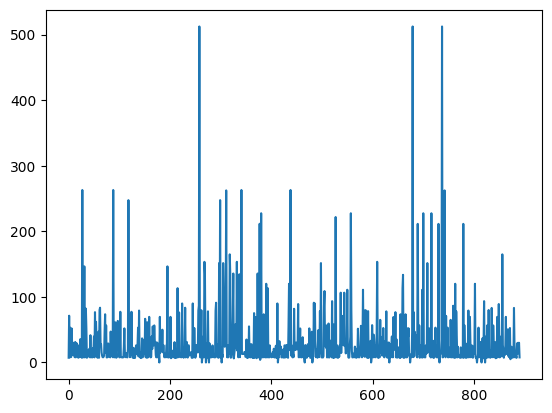

In [5]:
titanic = pd.read_csv('titanic.csv')
plt.plot(titanic.Fare)
plt.show()

(0.0, 300.0)

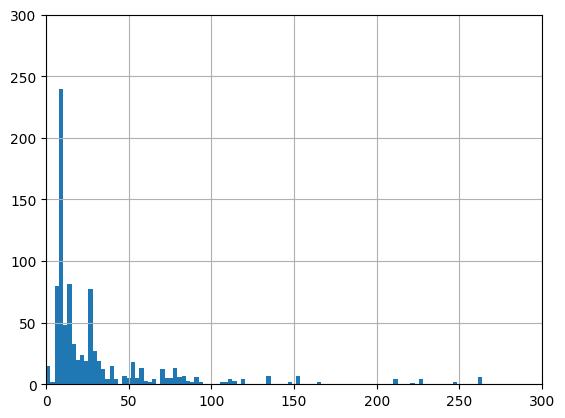

In [7]:
titanic.Fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,300)               # setting limit on x-axis
plt.ylim(0,300)               # setting limit on y-axis